In [2]:
import pandas as pd
df=pd.read_csv('d:/data/ozone/ozone4.csv')
df.head()

,Ozone,Solar.R,Solar.R2,Wind,Temp,Month,Day,Ozone2,Result
0,41.0,190.0,190.000000,7.4,67,5,1,41.00000,0
1,36.0,118.0,118.000000,8.0,72,5,2,36.00000,0
2,12.0,149.0,149.000000,12.6,74,5,3,12.00000,0
3,18.0,313.0,313.000000,11.5,62,5,4,18.00000,0
4,NaN,NaN,185.931507,14.3,56,5,5,42.12931,0


In [3]:
df['Result'].value_counts()

0    109
1     44
Name: Result, dtype: int64

In [4]:
cols=['Solar.R2','Wind','Temp']
X=df[cols]
y=df['Result']

In [5]:
#오버샘플링
from imblearn.over_sampling import SMOTE
X_sample,y_sample=SMOTE(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

Using TensorFlow backend.


In [6]:
df_samp['Result'].value_counts()

1    109
0    109
Name: Result, dtype: int64

In [7]:
X=X_samp[cols]
y=y_samp['Result']

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              stratify=y, random_state=10)

In [9]:
from sklearn.svm import SVC
model=SVC(random_state=10)
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [10]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7931034482758621
0.6818181818181818


Text(0, 0.5, 'valule')

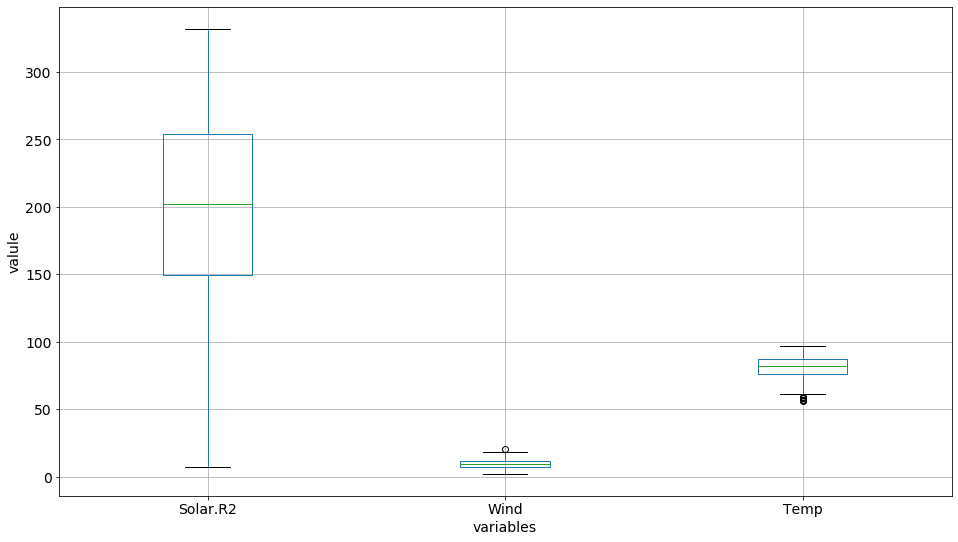

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,9)
plt.rcParams['font.size']=14
X_train.boxplot()
plt.xlabel('variables')
plt.ylabel('valule')

In [12]:
#0~1 정규화
min_on_training=X_train.min(axis=0) #특성별 최소값
range_on_training=(X_train-min_on_training).max(axis=0)#특성별 최대값
print(min_on_training)
print(range_on_training)
#각 변량에서 최소값을 빼고 범위로 나누는 작업
X_train_scaled=(X_train - min_on_training)/range_on_training
X_test_scaled=(X_test - min_on_training)/range_on_training

Solar.R2     7.0
Wind         2.3
Temp        56.0
dtype: float64
Solar.R2    325.0
Wind         18.4
Temp         41.0
dtype: float64


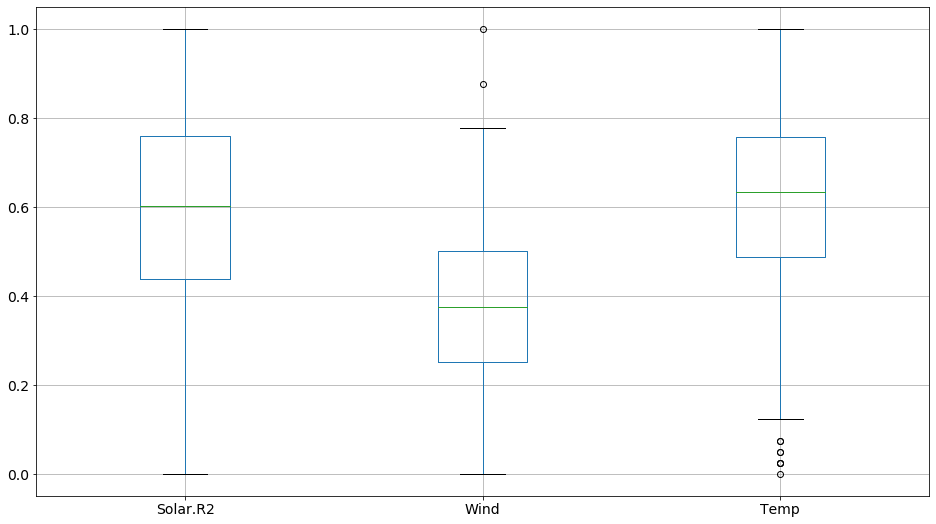

In [13]:
X_train_scaled.boxplot()

In [14]:
#표준화 : 평균은 0으로 표준편차는 1로 설정하는 방식
#거리 기반의 알고리즘에서 주로 사용되는 방식 (KNN,SVM,KMEANS 등)
#(측정값-평균)/표준편차
mean_on_train=X_train.mean(axis=0) #변수들의 평균값
std_on_train=X_train.std(axis=0) #변수들의 표준편차
X_train_scaled=(X_train - mean_on_train)/std_on_train
X_test_scaled=(X_test - mean_on_train)/ std_on_train

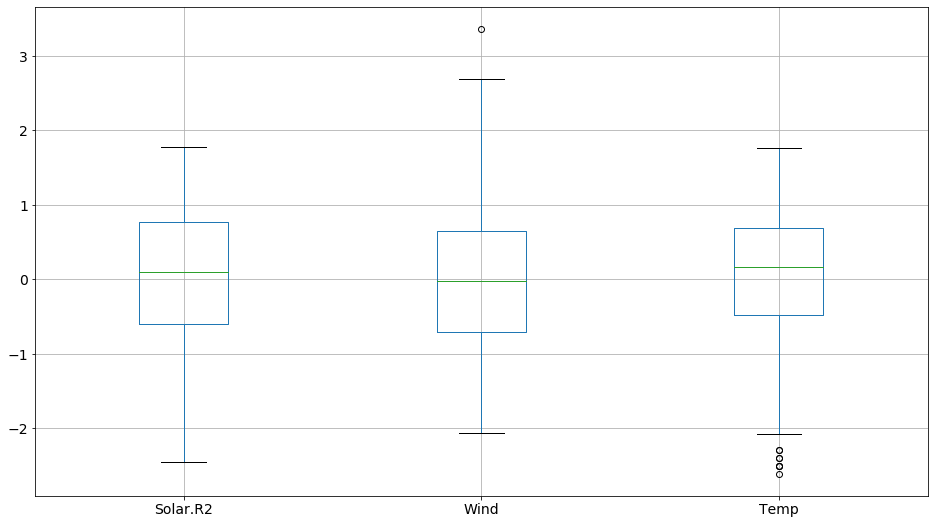

In [15]:
#표준화 이후의 박스플롯
X_train_scaled.boxplot()

In [16]:
X_train.describe() #정규화 이전의 기초 통계량

,Solar.R2,Wind,Temp
count,174.000000,174.000000,174.00000
mean,195.151358,9.286996,80.50000
std,76.860052,3.395273,9.39853
min,7.000000,2.300000,56.00000
25%,149.250000,6.900000,76.00000
50%,202.235893,9.200000,82.00000
75%,253.851079,11.500000,87.00000
max,332.000000,20.700000,97.00000


In [17]:
X_train_scaled.describe() #정규화 이후의 기초 통계량

,Solar.R2,Wind,Temp
count,1.740000e+02,1.740000e+02,174.000000
mean,5.129996e-16,3.360179e-16,0.000000
std,1.000000e+00,1.000000e+00,1.000000
min,-2.447973e+00,-2.057860e+00,-2.606791
25%,-5.972070e-01,-7.030353e-01,-0.478798
50%,9.217446e-02,-2.562283e-02,0.159599
75%,7.637221e-01,6.517896e-01,0.691598
max,1.780491e+00,3.361440e+00,1.755594


In [18]:
model=SVC(random_state=10)
model.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
#예측정확도
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))

0.8793103448275862
0.8181818181818182


최적의 C: 100
최적의 gamma: 0.1
최적의 정확도: 0.8409090909090909


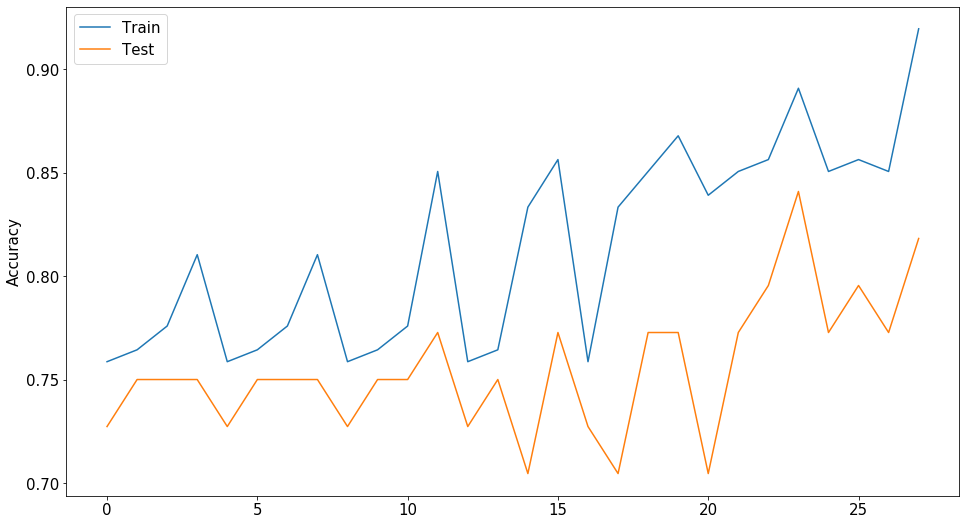

In [20]:
#최적의 cost,gamma를 찾는과정
import numpy as np
train_rate=[]
test_rate=[]
c_values=[0.001,0.01,0.1,1,10,100,1000]
gamma_values=[0.0001,0.001,0.01,0.1] 
for n in c_values:
    for g in gamma_values:
        model=SVC(C=n,gamma=g,random_state=10) #SVM 모형
        model.fit(X_train_scaled,y_train) #기계학습
        train_rate.append(
            [n,g,model.score(X_train_scaled,y_train)]) #학습용 정확도 리스트에 추가
        
        test_rate.append(
            [n,g,model.score(X_test_scaled,y_test)]) #검증용 정확도 리스트에 추가
        
train_arr=np.array(train_rate) #리스트를 넘파이 배열로 변환
test_arr=np.array(test_rate)
max_rate=np.max(test_arr[:,2]) #배열의 최대값
idx=np.where(test_arr==max_rate)[0][0] #최대값의 위치를 구함
print('최적의 C:',test_rate[idx][0])
print('최적의 gamma:',test_rate[idx][1])
print('최적의 정확도:',test_rate[idx][2])
plt.rcParams['font.size']=15
plt.plot(range(len(train_rate)),train_arr[:,2],label='Train')
plt.plot(range(len(test_rate)),test_arr[:,2],label='Test')
plt.ylabel('Accuracy')
plt.legend()

In [21]:
#최적의 C:100
#최적의 gamma 0.1
model=SVC(C=100,gamma=0.1, random_state=10)
model.fit(X_train_scaled,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [22]:
#예측정확도가 개선되지는 않음
print('학습용:{:6.2f}%'.format(model.score(X_train_scaled,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test_scaled,y_test)*100))

학습용: 89.08%
검증용: 84.09%


In [23]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test_scaled)
cm=confusion_matrix(y_test,pred) #오분류표
df_cm=pd.DataFrame(cm,index=['부족','충분'],columns=['부족','충분'])
df_cm

,부족,충분
부족,19,3
충분,4,18
